# Salinla Charintara, UID 706092622

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#drive.mount('/content/gdrive/', force_remount = True)

In [3]:
df = pd.read_csv("fraudTest.csv")

In [4]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [5]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/l5/vh91g6855p358fpdfrg4zy0h0000gn/T/ipykernel_2005/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/l5/vh91g6855p358fpdfrg4zy0h0000gn/T/ipykernel_2005/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
import sklearn
import imblearn


In [13]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [16]:
over_log.score(X_test, y_test)

0.9039084431008422

In [17]:
under_log.score(X_test, y_test)

0.9101945824036085

In [18]:
smote_log.score(X_test, y_test)

0.9028047697881427

# 5.) Which performed best in Out of Sample metrics?

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
y_true = y_test

In [23]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75109,  7935],
       [   75,   239]])

In [24]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7611464968152867


In [25]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75633,  7411],
       [   75,   239]])

In [26]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7611464968152867


In [27]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[75017,  8027],
       [   75,   239]])

In [28]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7611464968152867


In [55]:
# 3 models were equally effective in identifying the positive cases 

# 6.) Pick two features and plot the two classes before and after SMOTE.

In [30]:
column_names = X.columns
X_train_df = pd.DataFrame(X_train, columns=column_names)
raw_temp = pd.concat([X_train_df, y_train.reset_index(drop=True)], axis=1)

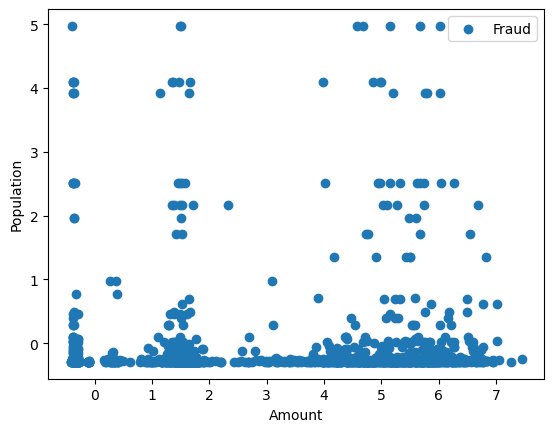

In [31]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

Data points clustered near the bottom of the plot indicates that most fraudulent transactions involve smaller amounts and occur more often in the smaller cities.

In [34]:
smote_X_df = pd.DataFrame(smote_X, columns=column_names)
raw_temp = pd.concat([smote_X_df, smote_y.reset_index(drop=True)], axis=1)


In [45]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [46]:
print(df['amt'].describe())
print(df['city_pop'].describe())

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64
count    5.557190e+05
mean     8.822189e+04
std      3.003909e+05
min      2.300000e+01
25%      7.410000e+02
50%      2.408000e+03
75%      1.968500e+04
max      2.906700e+06
Name: city_pop, dtype: float64


/Users/salinla/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


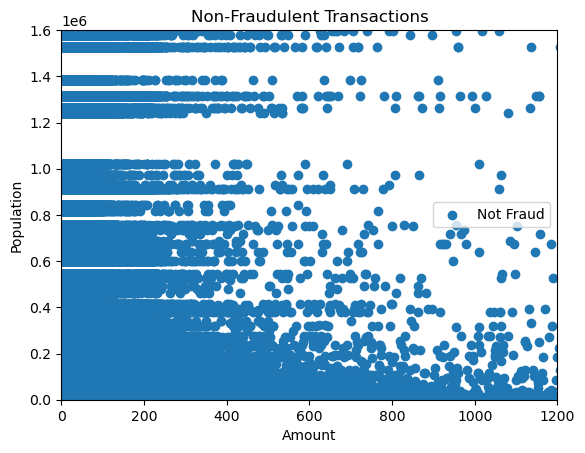

In [52]:
plt.scatter(df[df["is_fraud"] == 0]["amt"], df[df["is_fraud"] == 0]["city_pop"], label="Not Fraud")
plt.legend()
plt.xlabel("Amount")
plt.ylabel("Population")
plt.title("Non-Fraudulent Transactions")
plt.ylim(0, 1.6e6)  # Set y-axis limit from 0 to 1.6 million
plt.xlim(0, 1200)    # Set x-axis limit from 0 to 1200
plt.show()


# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [37]:
resampling_methods = {
    "over":RandomOverSampler(),
    "under":RandomUnderSampler(),
    "smote": SMOTE()
}

model_configs = {
    "LOG":LogisticRegression(),
    "LASSO":LogisticRegression(penalty = "l1",
                               C = 2.,solver="liblinear"),
    "DTREE":DecisionTreeClassifier()
}

In [38]:
def calc_pref_metric(y_true,y_pred):
    tn,fp,fn,tp = confusion_matrix(y_true,y_pred).ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [39]:
trained_models={}
results = []

In [40]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        m = model.fit(resample_X,resample_y)
        trained_models[combined_key] = m
        y_pred = m.predict(X_test)
        sensitivity, specificity, precision, recall, f1 = calc_pref_metric(y_test, y_pred)
        results.append({"Model": combined_key,
                        "Sentitivity": sensitivity,
                        "Specificity": specificity,
                        "Precision": precision,
                        "Recall": recall,
                        "F1": f1})

In [54]:
result_df = pd.DataFrame(results)
result_df

,Model,Sentitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.761146,0.904629,0.029293,0.761146,0.056414
1,over_LASSO,0.761146,0.904725,0.029322,0.761146,0.056468
2,over_DTREE,0.554140,0.998555,0.591837,0.554140,0.572368
3,under_LOG,0.761146,0.913419,0.032171,0.761146,0.061733
4,under_LASSO,0.761146,0.913106,0.032059,0.761146,0.061527
5,under_DTREE,0.955414,0.950195,0.067628,0.955414,0.126316
6,smote_LOG,0.761146,0.903738,0.029030,0.761146,0.055926
7,smote_LASSO,0.761146,0.903774,0.029040,0.761146,0.055946
8,smote_DTREE,0.687898,0.993064,0.272727,0.687898,0.390597


Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
>Logistic Regression and Lasso show comparable performance across all resampling methods. The Decision Tree Classifier generally exhibits higher precision and F1 scores but lower sensitivity, except with Under Sampling where it surpasses the other models in both sensitivity and F1 score. 

Choose what you think is the best model and why. test on Holdout
> For fraud detection, the Decision Tree with Under Sampling iwould be preferred due to its superior sensitivity and F1 score. 